In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import re

Only keeping the necessary columns.

In [ ]:
data = pd.read_csv('/content/Sentiment.csv')

In [ ]:
data = data[['sentiment', 'text']]

In [ ]:
data.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


#**Bar Chart**

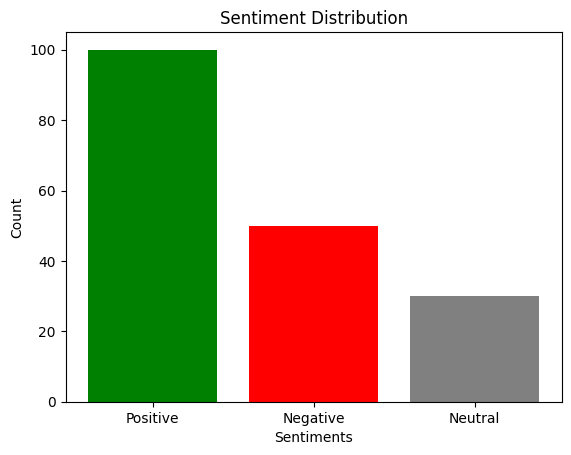

In [ ]:
import matplotlib.pyplot as plt

sentiments = ['Positive', 'Negative', 'Neutral']
counts = [100, 50, 30]  # Replace with actual counts

# Create a bar chart
plt.bar(sentiments, counts, color=['green', 'red', 'gray'])
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()


#**Histogram**

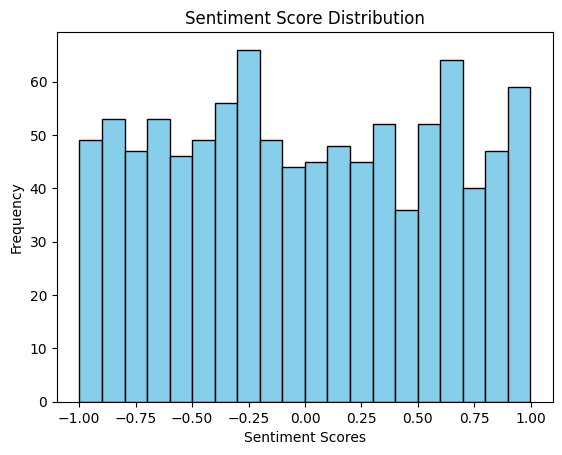

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

sentiment_scores = np.random.uniform(-1, 1, 1000)  # Replace with actual scores

# Create a histogram
plt.hist(sentiment_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Sentiment Scores')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()


#**World Cloud**

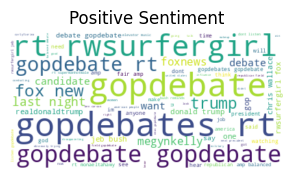

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Create word clouds for each sentiment
wordcloud_positive = WordCloud(background_color='white').generate(' '.join(data['text']))

# Plot the word clouds
plt.figure(figsize=(12, 12))

plt.subplot(131)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('text')
plt.axis('off')


plt.show()


In [ ]:
data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 'Positive'].size) #Positive
print(data[ data['sentiment'] == 'Negative'].size) #Negative

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')

max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

<ipython-input-10-ff315e90d17c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())
<ipython-input-10-ff315e90d17c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


4472
16986


In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (Spatial  (None, 28, 128)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 2)                 394       
                                                                 
Total params: 511194 (1.95 MB)
Trainable params: 511194 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7188, 28) (7188, 2)
(3541, 28) (3541, 2)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 40, batch_size=batch_size, verbose = 2)

Epoch 1/40
225/225 - 21s - loss: 0.4292 - accuracy: 0.8178 - 21s/epoch - 94ms/step
Epoch 2/40
225/225 - 19s - loss: 0.3167 - accuracy: 0.8670 - 19s/epoch - 82ms/step
Epoch 3/40
225/225 - 18s - loss: 0.2804 - accuracy: 0.8816 - 18s/epoch - 81ms/step
Epoch 4/40
225/225 - 19s - loss: 0.2489 - accuracy: 0.8947 - 19s/epoch - 82ms/step
Epoch 5/40
225/225 - 18s - loss: 0.2199 - accuracy: 0.9122 - 18s/epoch - 78ms/step
Epoch 6/40
225/225 - 18s - loss: 0.1938 - accuracy: 0.9206 - 18s/epoch - 82ms/step
Epoch 7/40
225/225 - 18s - loss: 0.1728 - accuracy: 0.9306 - 18s/epoch - 78ms/step
Epoch 8/40
225/225 - 21s - loss: 0.1642 - accuracy: 0.9318 - 21s/epoch - 93ms/step
Epoch 9/40
225/225 - 18s - loss: 0.1488 - accuracy: 0.9407 - 18s/epoch - 80ms/step
Epoch 10/40
225/225 - 18s - loss: 0.1373 - accuracy: 0.9441 - 18s/epoch - 80ms/step
Epoch 11/40
225/225 - 18s - loss: 0.1229 - accuracy: 0.9489 - 18s/epoch - 82ms/step
Epoch 12/40
225/225 - 18s - loss: 0.1247 - accuracy: 0.9488 - 18s/epoch - 78ms/step
E

In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

64/64 - 1s - loss: 1.0869 - accuracy: 0.8270 - 917ms/epoch - 14ms/step
score: 1.09
acc: 0.83


In [ ]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):

    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]

    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1

    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

1/1 - 0s - 196ms/epoch - 196ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 20ms/epoch - 20ms/step
1/1 - 0s - 19ms/epoch - 19ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 18ms/epoch - 18ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 17ms/epoch - 17ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 16ms/epoch - 16ms/step
1/1 - 0s - 26ms/epoch - 26ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 24ms/epoch - 24ms/step
1/1 - 0s - 23ms/epoch - 23ms/step
1/1 - 0s - 2

In [ ]:
twt = ["watching the primetime gopdebate this afternoon i think bencarson2016 was the real winner quiet but effective"]
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  118    1 1958    2   21   10   77 1063   22    1  209  283   33]]
1/1 - 0s - 22ms/epoch - 22ms/step
positive
